In [65]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import math
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud # word cloud

In [66]:
conversion_dic = {
    "gender": "category",
    "department": "category",
    "academic_year": "category",
    "current_residence": "category",
    "study_preference": "category",
    "gpa": "category",
    "sleep_hours": "category",
    "job_search_duration": "category",
    "higher_education": "category",
    "work_style": "category",
    "country_preference": "category",
    "sector_preference": "category",
    "field_preference": "category",
}

df = pd.read_csv("Cleaned Data.csv").astype(conversion_dic)

### Let's check the age distribution of different engineering departments

C:\Users\alini\AppData\Local\Temp\ipykernel_6756\3214787405.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = s["dep"].unique(), rotation=45, fontsize=8)


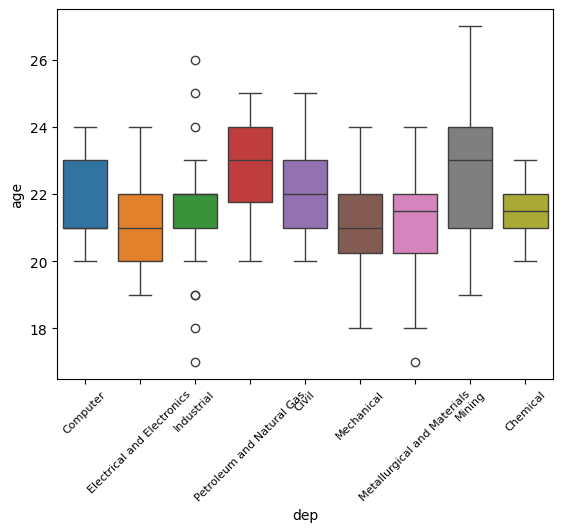

In [67]:
s = df.copy()

s["dep"] = df["department"].map({
    'Computer Engineering': 'Computer',
    'Electrical and Electronics Engineering': 'Electrical and Electronics',
    'Industrial Engineering': 'Industrial',
    'Petroleum and Natural Gas Engineering': 'Petroleum and Natural Gas',
    'Civil Engineering': 'Civil',
    'Mechanical Engineering': 'Mechanical',
    'Metallurgical and Materials Engineering': 'Metallurgical and Materials',
    'Mining Engineering': 'Mining',
    'Chemical Engineering': 'Chemical',
    'Food Engineering': 'Food'
})

ax = sns.boxplot(x="dep", y="age", hue="dep", data=s, legend=False)

ax.set_xticklabels(labels = s["dep"].unique(), rotation=45, fontsize=8)
plt.show()
# When salary_exp column is "clean", remove the filter
# Check for outliers

In [68]:
s.groupby("dep")["age"].mean() # Mining thas the highest

dep
Chemical                       21.500000
Civil                          22.137931
Computer                       21.681818
Electrical and Electronics     21.021277
Industrial                     21.542857
Mechanical                     21.055556
Metallurgical and Materials    21.222222
Mining                         22.705882
Petroleum and Natural Gas      22.650000
Name: age, dtype: float64

#### Test if average age of Mining Engineering students is greater than all of the engineering students at METU
##### Using stratified sample methods, construct a hypothesis

$$ H_0: \overline{x}_{mining} = \mu_{engineering} $$
$$ H_A: \overline{x}_{mining} > \mu_{engineering} $$

### First, compute the population average.


In [69]:
# There are 8258 engineering students at METU
# Lets estimate the proportion of all the students that prefer to work in Turkiye.

department_populations = {
    "CHEM": 785,
    "CE": 1233,
    "CENG": 938,
    "EE": 1325,
    "FE": 517,
    "IE": 734,
    "ME": 1293,
    "MALZ": 573,
    "MADEN": 427,
    "PETROL": 433,
}

department_samples = {
    "CHEM": 22,
    "CE": 29,
    "CENG": 22,
    "EE": 47,
    "FE": 21,
    "IE": 35,  
    "ME": 18,
    "MALZ": 18,
    "MADEN": 17,
    "PETROL": 20    
}

dep_means = df.groupby("department")["age"].mean()
# pd.crosstab(index = df["department"], columns = df["age"], normalize="index")
print(dep_means)

dep_stds = df.groupby("department")["age"].std()
print(dep_stds)

department
Chemical Engineering                       21.500000
Civil Engineering                          22.137931
Computer Engineering                       21.681818
Electrical and Electronics Engineering     21.021277
Food Engineering                           21.761905
Industrial Engineering                     21.542857
Mechanical Engineering                     21.055556
Metallurgical and Materials Engineering    21.222222
Mining Engineering                         22.705882
Petroleum and Natural Gas Engineering      22.650000
Name: age, dtype: float64
department
Chemical Engineering                       0.912871
Civil Engineering                          1.216674
Computer Engineering                       1.286796
Electrical and Electronics Engineering     1.390798
Food Engineering                           1.609496
Industrial Engineering                     1.771388
Mechanical Engineering                     1.551933
Metallurgical and Materials Engineering    1.895988
Mining

In [70]:
def stratified_mean(pop_dic, sample_means):
    if len(pop_dic) != len(sample_means):
        print("dictionary lengths are not equal")
        return None

    sum = 0
    for i in range(len(pop_dic)):
        p_i = sample_means[i]
        N_i = list(pop_dic.values())[i]
        sum += (N_i / 8258) * p_i

    return sum

def stratified_mean_var(pop_dic, sample_dic, sample_means, sample_vars):
    if len(pop_dic) != len(sample_means):
        print("dictionary lengths are not equal")
        return None

    sum = 0
    
    for i in range(len(pop_dic)):
        p_i = sample_means[i]
        n_i = list(sample_dic.values())[i]
        N_i = list(pop_dic.values())[i]
        s_i = sample_vars[i]
        print(p_i, n_i, N_i, s_i)
    
        sum += ((N_i / 8258) ** 2) * (1 - n_i / N_i) * ((s_i ** 2) / n_i)

    return sum

In [71]:
pop_mean = stratified_mean(department_populations, dep_means)
pop_var = stratified_mean_var(department_populations, department_samples, dep_means, dep_stds)

print("mean:", pop_mean, "SE:", np.sqrt(pop_var))

21.5 22 785 0.9128709291752767
22.137931034482758 29 1233 1.2166739770795054
21.681818181818183 22 938 1.2867960816866661
21.02127659574468 47 1325 1.3907983584997325
21.761904761904763 21 517 1.609495632325913
21.542857142857144 35 734 1.7713879095360283
21.055555555555557 18 1293 1.5519332240873458
21.22222222222222 18 573 1.8959881966484033
22.705882352941178 17 427 2.023755972268918
22.65 20 433 1.4964871146156014
mean: 21.593085038212504 SE: 0.0981356606856621


$$ H_0: \overline{x}_{mining} = 21.59 $$
$$ H_A: \overline{x}_{mining} > 21.59 $$
$$ \alpha = 0.10 $$

**Test these hypotheses, construct a 90% confidence interval for population mean.**
$ \bar{x} = 22.7$; $ S_E = 0.098 $
$$ t = \frac{\bar{x} - \mu}{S_E} $$
$$ t = \frac{22.7 - 21.59}{0.098} =  \approx 11 $$
### We reject null hypothesis. Mining students have a higher average age than engineering students at METU.



#### Construct a two-sided 90% confidence interval for engineering students at METU.
$$ \hat{x} \pm z_{\frac{\alpha}{2}} \times S_E = 21.59 \pm 1.65 \times 0.098 $$
$$ (21.4283, 21.7517) $$

## With 90% confidence, we can say that the true population age of engineering students at METU is between 21.43 and 21.75